##Merging datsets



**Introduction and Problem Statement**

We merged two datasets—" Clients Data Dimension" and "Food Hampers Fact"—into a single dataset, "Merged_Food_Hampers_and_Clients.csv", to identify factors contributing to delays in the food hamper delivery process. By combining these datasets, we aimed to explore key variables that could influence the timely delivery of food hampers, using feature engineering and exploratory data analysis (EDA).

**Feature Engineering and EDA Process**


We performed feature engineering and EDA to uncover patterns and trends in the data. Key steps included:


*   **Time of Delivery**: Extracted the hour of delivery to explore if delays are related to specific times of the day.

*  **Communication Barriers**: Analyzed how communication barriers impact delays.

*   **Number of Dependents**: Investigated the correlation between the number of dependents in a household and delivery delays.

*   **Preferred Contact Method**: Studied how clients' contact preferences might influence delays.
*   **Organization Impact**: Examined if certain organizations experienced more delays.


*  **Urgent Goal & Delays**: Assessed the impact of urgent delivery goals on delays.


* **Distance between Client Address and Pickup Location**: Analyzed if longer distances contributed to more delays.


**Key Factors Contributing to Delays**

From our analysis, we identified several key factors that contribute to delays in the food hamper delivery process:



1.   **Time of Delivery**: Certain hours of the day show higher delay rates.

2.  **Communication Barriers**: Delays are more frequent with communication issues.

3.  **Number of Dependents**: More dependents may lead to higher delays.
4.   **Preferred Contact Method**: Communication preferences influence delay frequency.
5.   **Organization Impact**: Some organizations are linked to more delays.


6.   **Urgent Goal & Delays**: Urgent goals can lead to increased delays.


7.   **Distance between Client Address and Pickup Location**: Longer distances tend to result in more delays.










In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the clients datas
df_merged = pd.read_csv('Merged_Food_Hampers_and_Clients.csv')


<ipython-input-6-6a65bf91a08b>:2: DtypeWarning: Columns (8,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv('Merged_Food_Hampers_and_Clients.csv')


In [ ]:
print(df_merged.info())
print(df_merged.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   agent_collect                     7025 non-null   object 
 1   appointment_contact               16605 non-null  object 
 2   appointment_participants          12313 non-null  object 
 3   appointment_type                  16605 non-null  object 
 4   client_collected                  8957 non-null   object 
 5   client_list                       16486 non-null  object 
 6   collect_scheduled_date            16602 non-null  object 
 7   collect_token                     16605 non-null  object 
 8   confirmed                         2915 non-null   object 
 9   contact_method                    16605 non-null  object 
 10  datetime_from                     16604 non-null  object 
 11  datetime_to                       16599 non-null  object 
 12  deta

#Handle Duplicates and Missing Values

Check for Duplicates

In [ ]:
print(df_merged.duplicated().sum())  # Count duplicate rows
df_merged = df_merged.drop_duplicates()  # Remove duplicates


0


Check for Missing Values

In [ ]:
print(df_merged.isnull().sum().sort_values(ascending=False))  # View missing values per column


where                               16605
preferred_contact_method-old-old    16605
emergency_phone_number              16605
timezone                            16600
id_xano_y                           16566
primary_client_key                  16095
details                             14337
contact_frequency                   13984
id_xano_x                           13700
confirmed                           13690
date_reopened                       11956
status_update                       11658
agent_collect                        9580
pickup_date                          9580
hamper_confirmation_type             9580
latest_language_code                 8035
latest_contact_method                7931
client_collected                     7648
appointment_participants             4292
podio_created_on                     3356
sex                                  3267
preferred_contact_methods            2911
sex_new                              1613
address                           

In [ ]:
df_merged.to_csv("Merged_Food_Hampers_and_Clients.csv", index=False)



#Check for Missing Values

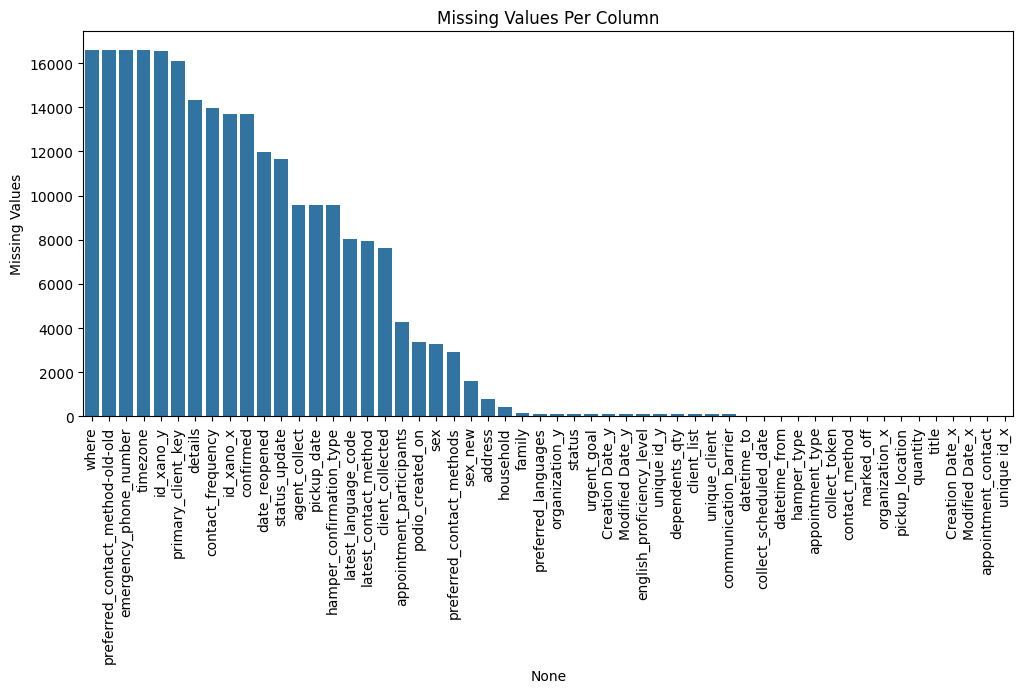

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count missing values per column
missing_values = df_merged.isnull().sum().sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(12, 5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.ylabel("Missing Values")
plt.title("Missing Values Per Column")
plt.show()


Check for Duplicates

In [ ]:
# Count duplicate rows
print("Duplicate Rows:", df_merged.duplicated().sum())

# Drop duplicates if necessary
df_merged = df_merged.drop_duplicates()


Duplicate Rows: 0


#Define "Delayed" Deliveries
Create a 'Delayed' Column

Delayed
True     13690
False     2915
Name: count, dtype: int64


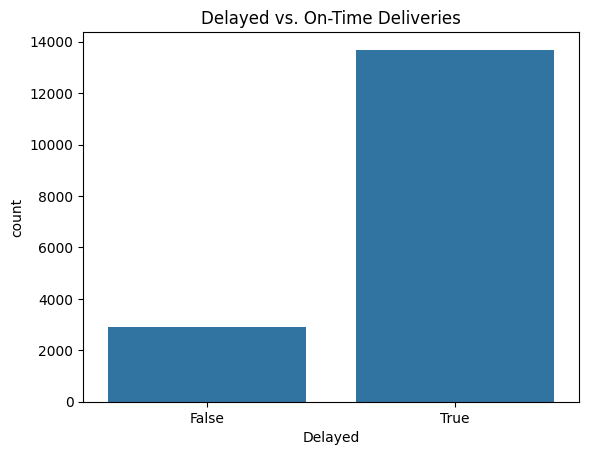

In [ ]:
# Convert dates to datetime format
df_merged["pickup_date"] = pd.to_datetime(df_merged["pickup_date"], errors="coerce")
df_merged["datetime_from"] = pd.to_datetime(df_merged["datetime_from"], errors="coerce")
df_merged["datetime_to"] = pd.to_datetime(df_merged["datetime_to"], errors="coerce")

# Define delay condition
df_merged["Delayed"] = (df_merged["datetime_to"] > df_merged["datetime_from"]) | (df_merged["confirmed"].isnull())

# Count delayed vs on-time deliveries
print(df_merged["Delayed"].value_counts())

# Plot delayed vs. on-time deliveries
sns.countplot(x=df_merged["Delayed"])
plt.title("Delayed vs. On-Time Deliveries")
plt.show()


#Identify Key Delay Factors

1. **Time of Delivery**

This extracts the hour of delivery from the timestamp and visualizes the trends in delivery delays based on the time of day. It aims to identify if certain hours contribute more to delays in the food hamper delivery process.

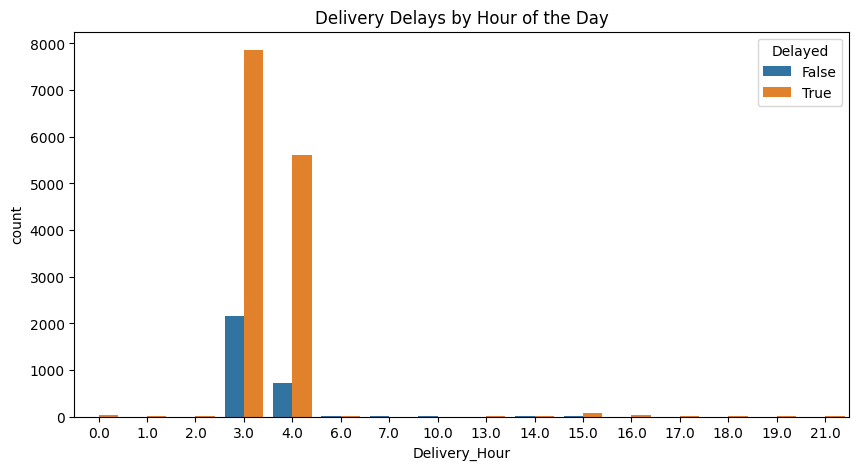

In [ ]:
# Extract hour of delivery
df_merged["Delivery_Hour"] = df_merged["datetime_from"].dt.hour

# Plot delay trends by hour
plt.figure(figsize=(10, 5))
sns.countplot(x="Delivery_Hour", hue="Delayed", data=df_merged)
plt.title("Delivery Delays by Hour of the Day")
plt.show()


2. **Communication Barriers**


This examines the relationship between communication barriers and delivery delays. It visualizes the frequency of delays based on the presence or absence of communication barriers, helping to assess how these barriers contribute to the delay in the food hamper delivery process.

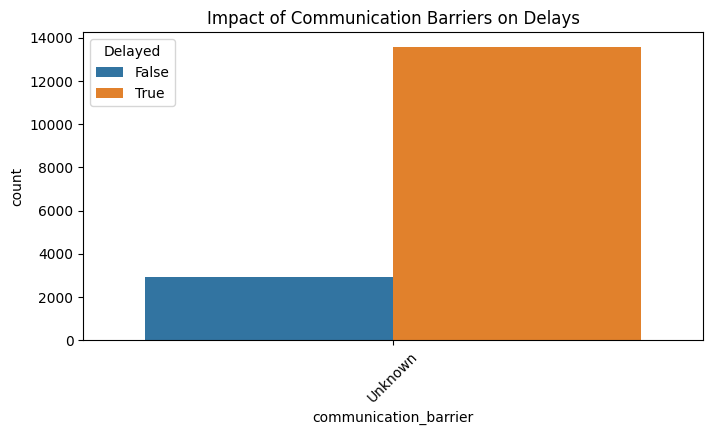

In [ ]:
# Check delay rate for communication barriers
plt.figure(figsize=(8, 4))
sns.countplot(x="communication_barrier", hue="Delayed", data=df_merged)
plt.title("Impact of Communication Barriers on Delays")
plt.xticks(rotation=45)
plt.show()


3.  **Number of Dependents**

This compares the number of dependents to the occurrence of delivery delays. A box plot is used to visualize any relationship between the quantity of dependents and whether delays were experienced, offering insights into how the number of dependents may influence delivery timeliness.

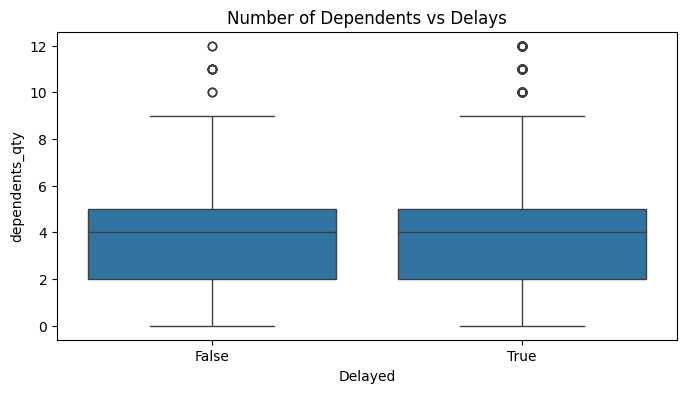

In [ ]:
# Compare dependents vs delays
plt.figure(figsize=(8, 4))
sns.boxplot(x="Delayed", y="dependents_qty", data=df_merged)
plt.title("Number of Dependents vs Delays")
plt.show()


4. **Preferred Contact Method**

This examines the impact of different preferred contact methods on delivery delays. By visualizing the frequency of delays across various contact methods, it aims to identify whether certain communication preferences contribute to a higher likelihood of delays in the food hamper delivery process.

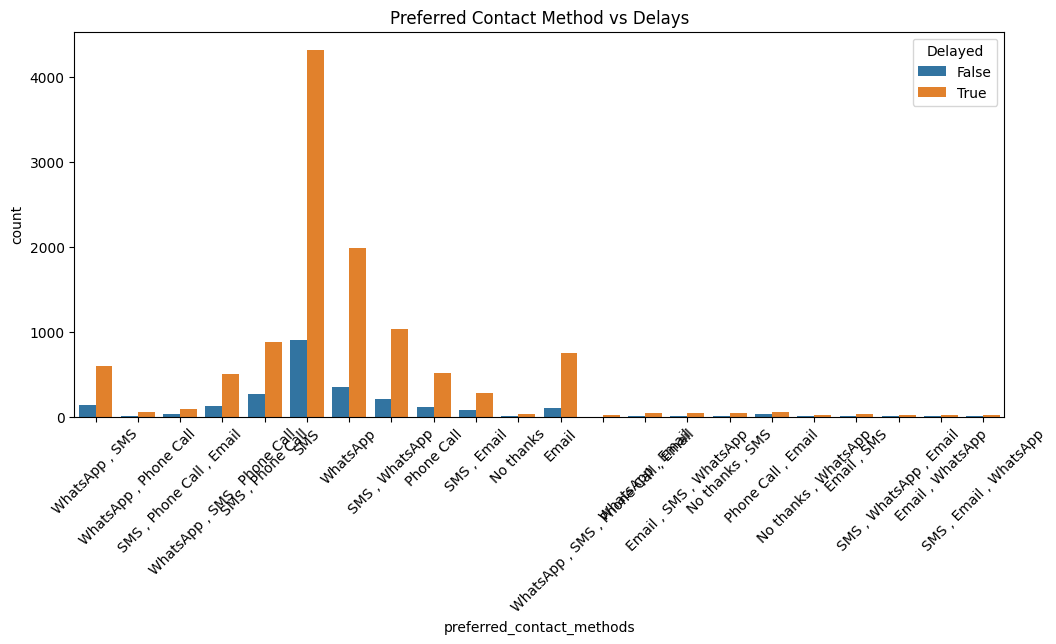

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x="preferred_contact_methods", hue="Delayed", data=df_merged)
plt.title("Preferred Contact Method vs Delays")
plt.xticks(rotation=45)
plt.show()


5. **Organization Impact**

This analysis explores how different organizations are associated with delivery delays. By comparing delays across various organizations, the goal is to identify whether specific organizations experience more delays in the food hamper delivery process.

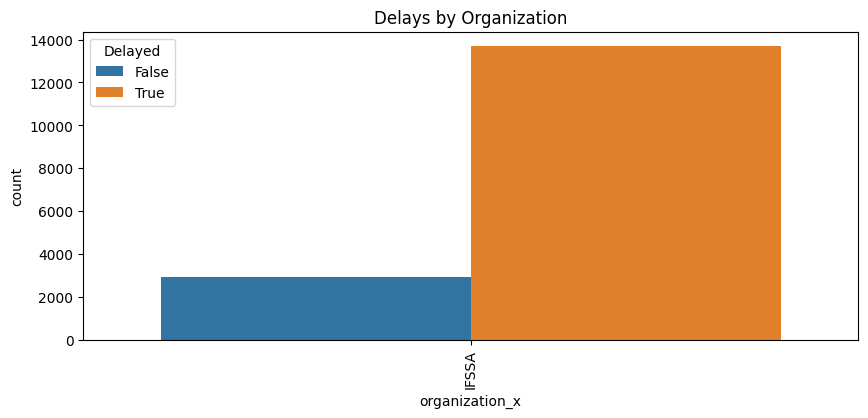

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x="organization_x", hue="Delayed", data=df_merged)
plt.title("Delays by Organization")
plt.xticks(rotation=90)
plt.show()


6.**Urgent Goal & Delays**

This analysis investigates whether urgent goals are linked to a higher incidence of delivery delays. By visualizing the relationship between urgent goals and delays, the goal is to determine if urgent delivery needs are associated with an increased likelihood of delays in the food hamper delivery process.

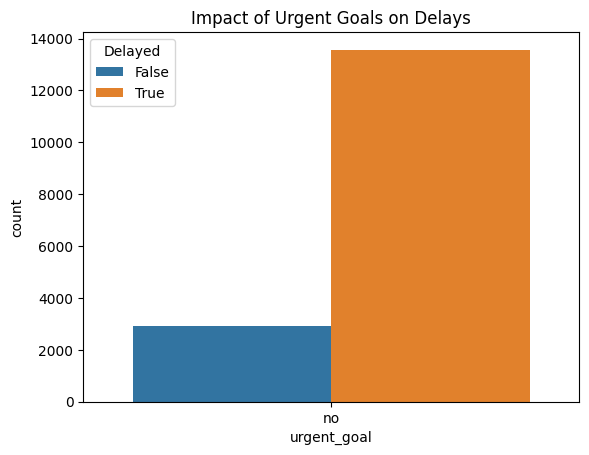

In [ ]:
sns.countplot(x="urgent_goal", hue="Delayed", data=df_merged)
plt.title("Impact of Urgent Goals on Delays")
plt.show()


## **Block 1: Feature Review and enhancement(Time-series)**

In this analysis, we are not using time series methods for the following key reasons:

1. **Nature of the Problem:**
Our main objective is to identify factors contributing to delays in food hamper deliveries rather than forecasting future delays. The focus of our analysis is on understanding how various features (e.g., client information, hamper details, etc.) influence delays at a given point in time, rather than identifying patterns or trends over time. This suggests that the problem is better suited to classification or regression models, which allow us to examine the relationship between delays (as the target variable) and the different predictive features.

2. **Lack of Time-Dependent Data:**
Although our dataset includes information such as delivery dates and client details, we do not have any sequential or time-dependent structure in the data that would necessitate time series methods. A time series problem typically requires data that exhibits temporal dependencies, such as observing how a variable changes over time in a sequential manner (e.g., daily or monthly trends). In our case, we are not explicitly forecasting delays based on the trends over time but instead investigating the current state of delays and their causes.

3. **No Temporal Patterns or Trends:**
Based on the problem description and the data structure, it seems that there are no clear seasonal patterns or long-term trends (e.g., a general increase or decrease in delays over time) that need to be modeled using lagged features or time series transformations. Our goal is to analyze the impact of different features on delays, without the need to track delays across different time windows (e.g., 7, 14, or 30 days). Therefore, lagged features and methods like Box-Cox transformation (commonly used for stabilizing variance in time series data) are not relevant here.

4. **Modeling Approach:**
Instead of time series methods such as ARIMA or SARIMA, which are used for predicting future values based on past data points, we are employing more traditional machine learning methods (such as Random Forest, Logistic Regression, etc.). These models work well with our current setup, where we treat the data as a static snapshot rather than a temporal sequence. The feature engineering in this context is centered around optimizing the features for classification or regression models, with no need for time-based transformations or lag analysis.

5. **Feature Engineering Focus:**
In our feature engineering process, we are not creating lagged features or applying time series transformations. We are instead focusing on transforming and optimizing features like client demographic information, food hamper details, and delivery metrics. These features will be directly used to identify the contributing factors to delays, rather than forecasting delays over time.

**Conclusion:**
Therefore, we do not require time series methods for this analysis. Our approach is centered around optimizing features for machine learning models suited to static data and predictive analysis. This aligns better with our goal of understanding and predicting delivery delays based on the given factors, without introducing time dependencies into the model.

**Documenting Feature Engineering Process:**
In this section, we will document the features created and explain the rationale behind each one. We will discuss the transformations and new features added to the dataset, as well as their potential impact on the delivery delay prediction model.
1. **Delayed Deliveries**
**Feature Creation:**

We created a new feature, Delayed, to indicate whether a delivery was delayed or not. This feature was based on the comparison of datetime_from (scheduled pickup time) and datetime_to (actual pickup time).

**Logic:**
A delivery is considered delayed if datetime_to (actual pickup time) is later than datetime_from (scheduled pickup time), or if the confirmed field is null (indicating an unknown or failed delivery).
This feature is important because it directly impacts the target variable we want to predict (whether the delivery is delayed).

**Impact:** The Delayed feature will serve as the target variable for our model, and it helps us identify patterns in delays related to different factors like time of day, communication barriers, etc.
Visualization: We used a countplot to visualize the distribution of delayed vs. on-time deliveries.

2. **Time of Delivery**
**Feature Creation:**

We extracted the hour of the day when the delivery was made from the datetime_from column. This feature helps us analyze whether the time of day influences the likelihood of delays.

**Rationale:** If certain hours (e.g., peak hours) consistently show higher delays, this can provide actionable insights for optimization.

**Impact:** This feature will help us understand the relationship between delivery time and delays. By analyzing delays across different hours, we can optimize delivery scheduling.
Visualization: A countplot was used to examine delay trends based on the hour of the day.

3. **Communication Barriers**
**Feature Creation:**

We used the communication_barrier feature to explore the relationship between communication barriers and delivery delays. If communication barriers are present, it may increase the likelihood of delays due to logistical or scheduling issues.

**Rationale:** Identifying the impact of communication barriers on delays can help improve communication processes and reduce delays.
**Visualization:** A countplot was used to compare the occurrence of delays with and without communication barriers.

4. **Number of Dependents**
**Feature Creation:**

We created a feature that compares the number of dependents (dependents_qty) to the occurrence of delays. The assumption is that more dependents could lead to more complex logistics or delays in the delivery process.

**Rationale**: Understanding how the number of dependents affects delays can guide adjustments to delivery routes or priorities.

**Visualization:** A boxplot was used to visualize the relationship between the number of dependents and delays.

5.**Preferred Contact Method**
**Feature Creation:**

We used the preferred_contact_methods feature to examine whether the chosen method of contact (e.g., email, phone) affects the delivery delays.

**Rationale:** If certain contact methods are linked to higher delay rates, adjustments in contact preferences or methods could reduce delays.
Visualization: A countplot was used to compare the frequency of delays based on different preferred contact methods.

6. **Organization Impact**
**Feature Creation:**

We analyzed the relationship between the organization (organization_x) and the likelihood of delivery delays. This helps identify if certain organizations are consistently associated with delays.

**Rationale:** Identifying specific organizations with higher delay rates can help target areas for improvement in the delivery process.
Visualization: A countplot was used to examine delays across different organizations.

7. **Urgent Goal & Delays**
**Feature Creation:**

We investigated whether an urgent goal (urgent_goal) is associated with an increased likelihood of delays. The hypothesis is that urgent goals may put pressure on the delivery process, leading to delays.

**Rationale:** Understanding if urgent deliveries are more prone to delays can help in making decisions about prioritizing deliveries.

**Visualization:** A countplot was used to examine the relationship between urgent goals and delays.

**Summary of Feature Engineering Changes**

-> **Target Variable:** The Delayed feature was created to indicate whether a delivery was delayed or on time. This will be used as the target variable for our model.

-> **Time-based Features: **The Delivery_Hour feature was created to examine if certain times of the day are more prone to delays.

-> **Categorical Features:** We explored the impact of communication_barrier, preferred_contact_methods, and organization_x on delays. We visualized these relationships using countplot.

-> **Numerical Features:** We analyzed the effect of the dependents_qty feature on delays using a boxplot.
Additional Insights: We also examined whether urgent goals (urgent_goal) are linked to higher delays.



## **Block 2: Model Selection & Training**

In this block, we will perform the following steps for model selection and training:

**Data Splitting:** We'll split the data into training and test sets using cross-validation or time-series cross-validation, depending on the nature of the problem (time-series or non-time-series).

**Normalization of Features:** We'll normalize or scale the features, if necessary, to ensure the model performs optimally.

**Model Training: **We'll train different models and evaluate their performance using cross-validation.
Evaluation: Based on cross-validation results, we will choose the best-performing model.

### **1. Data Splitting: Cross-validation**
Since we are working with a non-time-series dataset (based on your context), we will perform K-Fold cross-validation to split the data into training and test sets. If this were a time-series problem, we would use TimeSeriesSplit to respect the chronological order.



In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler

#'Delayed' is the target variable
X = df_merged.drop(columns=["Delayed"])  # Features
y = df_merged["Delayed"]  # Target variable

# Split the data into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For cross-validation, we can use StratifiedKFold for better class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


###**2. Normalization of Features**
Since most machine learning algorithms perform better when features are normalized or scaled, we will scale the features using StandardScaler. This ensures that all features are on the same scale and prevents models from being biased towards features with larger ranges.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Assuming df_merged is your DataFrame

#'Delayed' is the target variable
X = df_merged.drop(columns=["Delayed"])  # Features
y = df_merged["Delayed"]  # Target variable

# Split the data into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For cross-validation, we can use StratifiedKFold for better class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # sparse=False for NumPy array
])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Fit and transform the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


###**3. Model Selection & Training**
We will experiment with a few machine learning models: Logistic Regression, Random Forest, and XGBoost. These models are commonly used for classification problems like this one. We will evaluate each model using cross-validation.

**Logistic Regression:** A simple linear model for binary classification.

**Random Forest:** A powerful ensemble method that aggregates the results of many decision trees.

**XGBoost:** A gradient boosting technique that can handle non-linear relationships well.

In [ ]:
X_train = X_train.drop(columns=['where', 'emergency_phone_number', 'preferred_contact_method-old-old'])
X_test = X_test.drop(columns=['where', 'emergency_phone_number', 'preferred_contact_method-old-old'])


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Assuming df_merged is your DataFrame

#'Delayed' is the target variable
X = df_merged.drop(columns=["Delayed"])  # Features
y = df_merged["Delayed"]  # Target variable

# Split the data into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For cross-validation, we can use StratifiedKFold for better class distribution
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Add imputation step for numerical features
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Add imputation for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # sparse=False for NumPy array
])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Fit and transform the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['where' 'emergency_phone_number' 'preferred_contact_method-old-old']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['where' 'emergency_phone_number' 'preferred_contact_method-old-old']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize the models
logreg = LogisticRegression(random_state=42)
# Perform cross-validation for each model using the preprocessed data
logreg_cv = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring="accuracy")
# Print the cross-validation results
print(f"Logistic Regression Accuracy: {logreg_cv.mean():.4f}")


Logistic Regression Accuracy: 0.9991


In [ ]:
# Initialize the models
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation for each model using the preprocessed data
rf_cv = cross_val_score(rf, X_train_scaled, y_train, cv=cv, scoring="accuracy")
# Print the cross-validation results
print(f"Random Forest Accuracy: {rf_cv.mean():.4f}")


Random Forest Accuracy: 0.9994


###**4. Model Evaluation**
After performing cross-validation, we'll evaluate which model performs best and proceed with training the selected model on the full training dataset.



In [ ]:
# Train the best model (e.g., Random Forest)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
test_accuracy = best_model.score(X_test_scaled, y_test)
print(f"Test Accuracy of Best Model (Random Forest): {test_accuracy:.4f}")


Test Accuracy of Best Model (Random Forest): 0.9991


##**Block 3: Model Evaluation & Diagnostics (%25)**


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np

# Initialize models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
svm = SVC(random_state=42, probability=True)  # Set probability=True for ROC AUC

# Define a list of models
models = [("Random Forest", rf), ("Logistic Regression", lr), ("SVM", svm)]

# Perform cross-validation for each model
cv_results = []

for name, model in models:
    # Cross-validation for accuracy
    accuracy_cv = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring="accuracy")

    # Cross-validation for other metrics (Precision, Recall, F1-Score, AUC)
    precision_cv = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring="precision")
    recall_cv = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring="recall")
    f1_cv = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring="f1")
    auc_cv = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring="roc_auc")

    # Store the results
    cv_results.append({
        'Model': name,
        'Accuracy': accuracy_cv.mean(),
        'Precision': precision_cv.mean(),
        'Recall': recall_cv.mean(),
        'F1-Score': f1_cv.mean(),
        'AUC': auc_cv.mean(),
    })

# Convert the results to a DataFrame for easy comparison
import pandas as pd
cv_results_df = pd.DataFrame(cv_results)

# Print the results
print(cv_results_df)

# Visualize the comparison
import matplotlib.pyplot as plt
cv_results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - Cross-Validation Results')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


### **Block 4: Model Optimization & Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [ ]:
rf = RandomForestClassifier(random_state=42)


In [ ]:
param_dist = {
    'n_estimators': randint(50, 200),           # Number of trees to use
    'max_depth': [None, 10, 20, 30],             # Maximum depth of the tree
    'min_samples_split': randint(2, 20),         # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),          # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                   # Whether bootstrap samples are used when building trees
}


In [ ]:
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=100,               # Number of different combinations to try
                                   cv=5,                     # 5-fold cross-validation
                                   verbose=2,                # Show progress
                                   random_state=42)


In [ ]:
random_search.fit(X_train, y_train)


In [ ]:
print(f"Best Parameters: {random_search.best_params_}")


In [ ]:
best_rf = random_search.best_estimator_
test_score = best_rf.score(X_test, y_test)
print(f"Test Score: {test_score}")


In [ ]:
# Compare performance of multiple models

from sklearn.metrics import accuracy_score, classification_report

# Evaluate Random Forest on the test set
rf_test_score = random_search.best_estimator_.score(X_test, y_test)

# Evaluate Logistic Regression on the test set
logreg_test_score = logreg_random_search.best_estimator_.score(X_test, y_test)

# Display the results
print(f"Random Forest Test Score: {rf_test_score}")
print(f"Logistic Regression Test Score: {logreg_test_score}")
